# Exploring Dandiset 000690: Electrophysiology and Visual Stimuli

**Note:** This notebook was generated by an AI and has not been fully verified. Users should exercise caution and independently verify the code and interpretations.

## Overview of Dandiset 000690

This Dandiset, "Allen Institute Openscope - Vision2Hippocampus project", contains data related to understanding how neural representations of simple and natural visual stimuli evolve across different brain regions in mice, from the LGN to hippocampus. The dataset includes extracellular electrophysiology data and potentially image data.

You can find more information about this Dandiset on the DANDI archive: https://dandiarchive.org/dandiset/000690/0.250326.0015

## What this notebook covers

This notebook will demonstrate how to:
1. Load the Dandiset using the DANDI API.
2. Access a specific NWB file containing electrophysiology data.
3. Examine metadata within the NWB file.
4. Load and visualize a subset of the LFP (Local Field Potential) data.
5. Explore the electrode information.

## Required Packages

To run this notebook, you need the following Python packages installed:
- dandi
- pynwb
- h5py
- remfile
- numpy
- matplotlib
- pandas

## Loading the Dandiset

We will use the `dandi` Python client to connect to the DANDI archive and access the Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690", "0.250326.0015")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb (ID: b0ea16d5-42eb-4b56-87cc-7d7b7efab4db)
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb (ID: e0ad1921-75f1-43ed-aa86-8e1a45a9f49d)
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb (ID: 97712120-158d-492a-ae21-61515335bc18)
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb (ID: de12ccea-83a7-4d7f-937c-4c02e4d3bf44)
- sub-692077/sub-692077_ses-1300222049.nwb (ID: 8ae65111-a130-47fc-a108-55e695374739)


## Accessing a specific NWB file

This Dandiset contains multiple NWB files. For this notebook, we will focus on an electrophysiology file from a specific subject and session: `sub-692072/sub-692072_ses-1298465622_probe-1_ecephys.nwb`.

We can load this remote NWB file directly using `pynwb`, `h5py`, and `remfile`.

Neurosift link for this NWB file: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/79686db3-e4ef-4214-89f9-f2589ddb4ffe/download/&dandisetId=000690&dandisetVersion=draft

In [2]:
import pynwb
import h5py
import remfile

# URL for the specific NWB file
url = "https://api.dandiarchive.org/api/assets/79686db3-e4ef-4214-89f6-f2589ddb4ffe/download/"

# Load the NWB file
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print("NWB file loaded successfully.")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file loaded successfully.


## Examining NWB file contents

The loaded `nwb` object contains various data streams and metadata. We can explore its structure to see what information is available. Based on the `nwb-file-info` tool output, this file contains LFP data and electrode information.

```
nwb
├── acquisition (LabelledDict)
│   └── probe_1_lfp (LFP)
│       └── electrical_series (LabelledDict)
│           └── probe_1_lfp_data (ElectricalSeries)
│               ├── data (Dataset) shape (10117098, 73); dtype float32
│               ├── timestamps (Dataset) shape (10117098,); dtype float64
│               └── electrodes (DynamicTableRegion)
├── electrode_groups (LabelledDict)
│   └── probeB (EcephysElectrodeGroup)
├── devices (LabelledDict)
│   └── probeB (EcephysProbe)
├── stimulu
├── electrodes (DynamicTable)
│   ├── id (ElementIdentifiers)
│   ├── location (VectorData)
│   ├── group (VectorData)
│   ├── group_name (VectorData)
│   ├── probe_vertical_position (VectorData)
│   ├── probe_horizontal_position (VectorData)
│   ├── probe_id (VectorData)
│   ├── local_index (VectorData)
│   ├── valid_data (VectorData)
│   ├── x (VectorData)
│   ├── y (VectorData)
│   ├── z (VectorData)
│   ├── imp (VectorData)
│   └── filtering (VectorData)
└── subject (EcephysSpecimen)
```

## Exploring LFP Data

The LFP data is stored in the `acquisition` section of the NWB file. We can access it and visualize a small subset to get an idea of the signals. It's important to load only a subset of the data and timestamps to avoid excessive memory usage, as the full datasets can be very large.

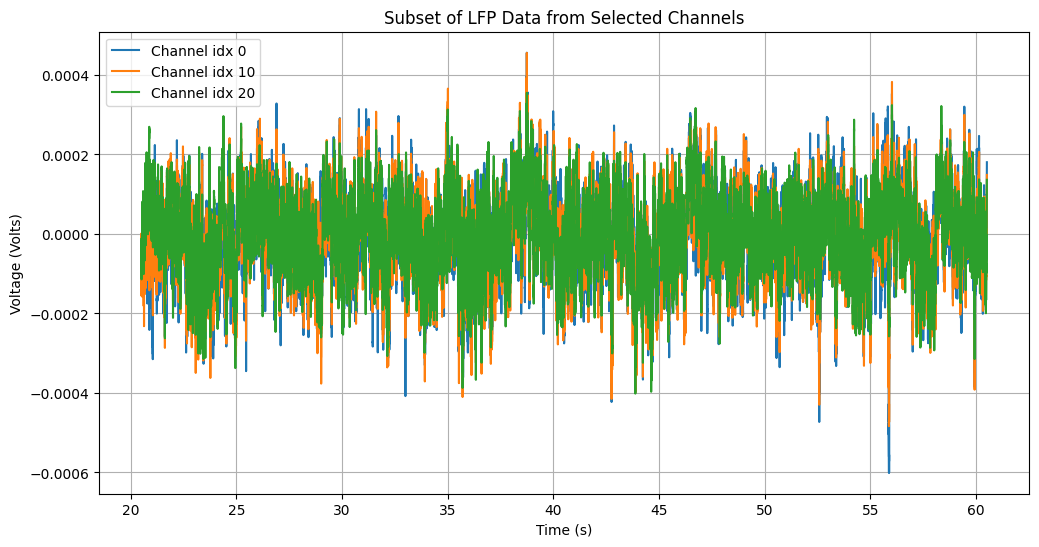

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Access LFP data
probe_1_lfp_data = nwb.acquisition["probe_1_lfp"].electrical_series["probe_1_lfp_data"]

# Load a small subset of the data and timestamps
num_timepoints_to_load = 50000
channels_to_plot = [0, 10, 20] # Plotting data from channels with indices 0, 10, and 20
lfp_data_subset = probe_1_lfp_data.data[0:num_timepoints_to_load, channels_to_plot]
timestamps_subset = probe_1_lfp_data.timestamps[0:num_timepoints_to_load]

# Plot the data
plt.figure(figsize=(12, 6))
for i, channel_index in enumerate(channels_to_plot):
    # Using the actual channel index for the label
    plt.plot(timestamps_subset, lfp_data_subset[:, i], label=f'Channel idx {channel_index}')

plt.xlabel('Time (s)')
plt.ylabel('Voltage (Volts)')
plt.title('Subset of LFP Data from Selected Channels')
plt.legend()
plt.grid(True)
plt.show()

The plot above shows a small segment of LFP data from three selected channels. The waveforms appear noisy, which is typical for raw LFP data. Further analysis, such as filtering or spectral analysis, would be needed to identify oscillations or other patterns.

## Exploring Electrode Information

The `electrodes` table in the NWB file provides detailed information about each electrode used in the recording, including their location and position on the probe. We can load this table into a pandas DataFrame for easier inspection.

In [4]:
import pandas as pd

# Access the electrode table
electrode_table = nwb.electrodes

# Convert to a pandas DataFrame and display the head
electrode_df = electrode_table.to_dataframe()
print("Electrode table head:")
display(electrode_df.head())

Electrode table head:


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
1002,SUB,probeB abc.EcephysElectrodeGroup at 0x12418034...,probeB,40,59,1,2,True,9393.0,3901.0,9310.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1006,SUB,probeB abc.EcephysElectrodeGroup at 0x12418034...,probeB,80,59,1,6,True,9400.0,3871.0,9309.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1010,SUB,probeB abc.EcephysElectrodeGroup at 0x12418034...,probeB,120,59,1,10,True,9406.0,3840.0,9308.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1014,SUB,probeB abc.EcephysElectrodeGroup at 0x12418034...,probeB,160,59,1,14,True,9415.0,3802.0,9307.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
1018,SUB,probeB abc.EcephysElectrodeGroup at 0x12418034...,probeB,200,59,1,18,True,9421.0,3770.0,9306.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


The table above shows the first few rows of the electrode information. It includes columns like `location` (brain region), `probe_vertical_position`, and `probe_horizontal_position`, which can be used to understand the spatial arrangement of the electrodes.

## Summary and Future Directions

This notebook demonstrated how to access and explore basic electrophysiology data (LFP) and electrode information from a specific NWB file within Dandiset 000690. We learned how to load the Dandiset, locate an NWB asset, and access key data streams within the file.

Possible future directions for analysis include:
- Performing filtering or spectral analysis on the LFP data to investigate oscillations.
- Examining other NWB files in the Dandiset, potentially including image data if available.
- Analyzing stimulus presentation timing and correlating neural activity with stimuli.
- Investigating the spatial distribution of neural activity across electrodes based on their positions.

In [5]:
# It's generally good practice to close the NWB file when done, although not strictly necessary
# io.close()